# Car Plate Character Segmenttion
### Reference："Detecting the Car Number Plate Using Segmentation" V. Lakshmi Priya 1, K. Perumal2

You'd better read this paper to get a feeling on how to detect the car plate numbers.
You can find this paper in the project papers subfolder.
We also provide a few related papers for your reference.


In [1]:
import skimage.io as io
import skimage.color as color
import skimage.morphology as morphology
import skimage.feature as feature
import skimage.measure as measure
import skimage.transform as transform
import numpy as np
import math
import os

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

There are four car plates in carplate subfolder. 
How many plates can be recognized by your character recognition model?
Is it possible to recognize all of them? Any problem?

# Use Hyperlpr to derive car plate result

In [3]:
from hyperlpr import * 
import cv2
filePath = 'carplate_copy'
for i,j,k in os.walk(filePath):
    for file in k:
        img = cv2.imread("carplate_copy/"+file)
        res = HyperLPR_plate_recognition(img)
        print(res)

(1, 3, 79, 263)
0 0 248 78
[['京H99999', 0.9773347292627607, [0, 0, 248, 78]]]
(1, 3, 125, 402)
0 0 347 95
[['鲁Y44748', 0.9803385393960136, [0, 0, 347, 95]]]
(1, 3, 271, 749)
[]
(1, 3, 54, 179)
0 0 168 53
[['皖AA3610', 0.9772850956235614, [0, 0, 168, 53]]]
(1, 3, 128, 401)
0 0 350 93
[['粤B5PQ23', 0.982789899621691, [0, 0, 350, 93]]]
(1, 3, 157, 424)
0 0 362 104
[['粤新T9048', 0.961929202079773, [0, 0, 362, 104]]]


# 1. Load one car plate image

In [4]:
#img = io.imread('./carplate/粤B5PQ23.png')  #ok
#img = io.imread('./carplate/粤OT9048.png')  #ok
#img = io.imread('./carplate/青AE8636.png')  #ok
#img = io.imread('./carplate/鲁Y44748.png') #ok
img = io.imread('./carplate/京H99999.jpg') 
#img = io.imread('./carplate/皖AA3610.png')

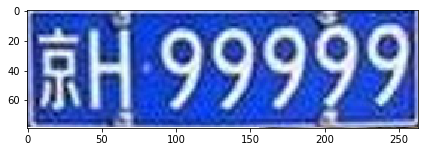

In [5]:
io.imshow(img)

# 2. Transform to Grey Image

In [6]:
img2 = color.rgb2gray(img)

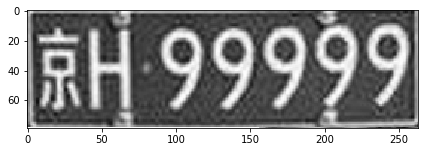

In [7]:
io.imshow(img2)

# 3. Apply Canny Edge Detection and Dilation

In [8]:
#Please change the following corresponding to each picture
#img3 = feature.canny(img2, sigma=1).astype(float)  #pic1
#img3 = feature.canny(img2, sigma=3).astype(float) #pic2
#img3 = feature.canny(img2, sigma=1.5,low_threshold=0.5,high_threshold=0.5).astype(float)  #pic3
#img3 = feature.canny(img2, sigma=3).astype(float) #pic4
img3 = feature.canny(img2, sigma=3, low_threshold=0.2, high_threshold = 0.2).astype(float) #pic5
#img3 = feature.canny(img2, sigma=0.05,low_threshold=0.8,high_threshold=0.9).astype(float) #pic6

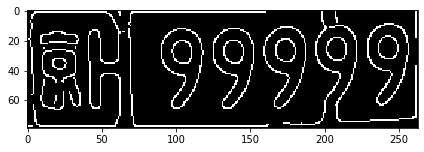

In [9]:
io.imshow(img3)

In [10]:
img4 = morphology.dilation(img3)

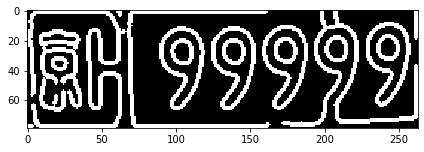

In [11]:
io.imshow(img4)

In [12]:
print(img4)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


# 4. Label and Region Proposal

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


E:\anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


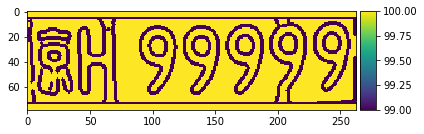

In [13]:
img4[:5]  = 0
img4[-5:] = 0
img4[5]  = 1
img4[-6] = 1
print(img4)
img4 = 100 - img4
io.imshow(img4)

In [14]:
img4

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

E:\anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


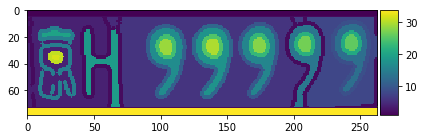

In [15]:
label_img = measure.label(img4)
io.imshow(label_img)
regions = measure.regionprops(label_img)
#print(regions)

10 158 67 189
11 89 67 120
11 124 67 154
11 231 62 255
12 196 73 220
13 8 68 37
15 43 73 70


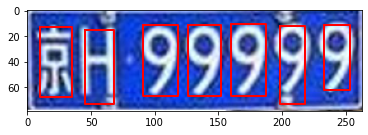

In [16]:
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

def in_bboxes(bbox, bbos):
    for bb in bboxes:
        minr0, minc0, maxr0, maxc0 = bb
        minr1, minc1, maxr1, maxc1 = bbox
        if minr1 >= minr0 and maxr1 <= maxr0 and minc1 >= minc0 and maxc1 <= maxc0:
            return True
    return False

bboxes = []
for props in regions:
    y0, x0 = props.centroid
    minr, minc, maxr, maxc = props.bbox
    
    if maxc - minc > img4.shape[1] / 7 or maxr - minr < img4.shape[0] / 3:
        continue
        
    bbox = [minr, minc, maxr, maxc]
    if in_bboxes(bbox, bboxes):
        continue
        
    if abs(y0 - img4.shape[0] / 2) > img4.shape[0] / 4:
        continue
       
    if(minr > 100):
        minr = 50
        bbox = [minr, minc-2, maxr, maxc+2]
    if minr <10:
        minr = 20
        bbox = [minr, minc, maxr, maxc]   
        
    bboxes.append(bbox)

#clean the boxes if there are too many boxes
remove_idx = []
if len(bboxes) > 7:
    tmp_box = np.mean(bboxes, axis=0)
    for i in range(len(bboxes)):
        h = bboxes[i][2] - bboxes[i][0]
        w = bboxes[i][3] - bboxes[i][1]
        if h < tmp_box[2] - tmp_box[0] - 5:
            # if the box height is little, remove it
            remove_idx.append(i)
        if w < (tmp_box[3] - tmp_box[1]) / 3 * 2:
            # if the box width is little, remove it
            if i not in drop_idx:
                remove_idx.append(i)
        if h / (w * 0.77) < 1.7:
            # if the ratio of height and width is too small, then drop
            if i not in remove_idx:
                remove_idx.append(i)

remove_idx = np.sort(remove_idx)
for i in remove_idx[::-1]:
    bboxes.pop(i)

for bbox in bboxes:
    minr, minc, maxr, maxc = bbox
    print(minr,minc,maxr,maxc)
    minc += 2
    maxc -= 2
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-r', linewidth=2)

# 5. Retrieve Each Character Image

In [17]:
bboxes = sorted(bboxes, key=lambda x: x[1])

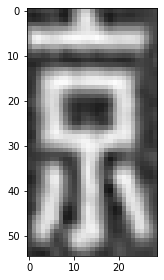

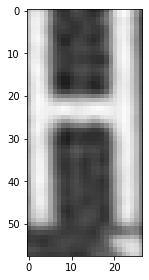

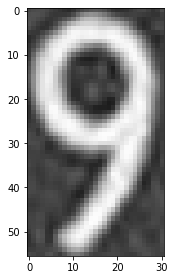

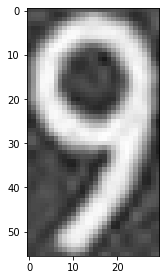

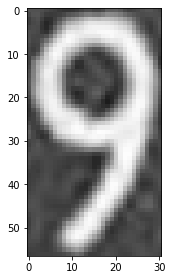

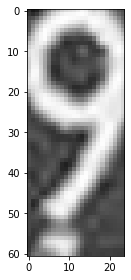

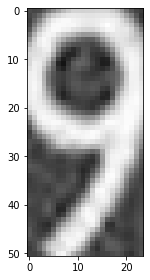

In [18]:
chars = []
for bbox in bboxes:
    minr, minc, maxr, maxc = bbox
    ch = img2[minr:maxr, minc:maxc]
    chars.append(ch)
    io.imshow(ch)
    plt.show()

# 6. Image Enhancement
In order to improve the recognition rate, it may need to do image enhancement before character recognition.

Leave this as an excrcise for you.

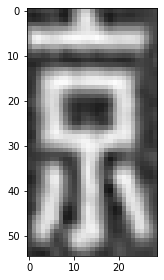

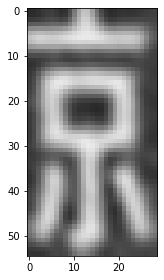

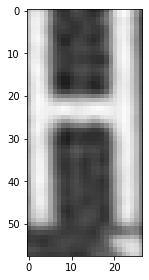

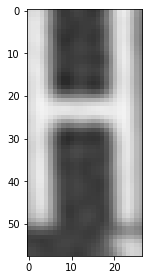

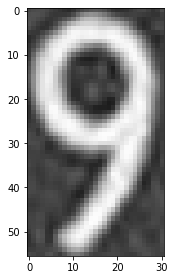

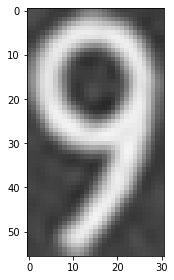

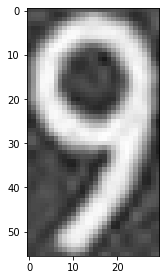

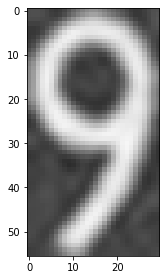

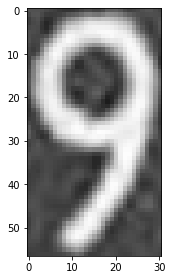

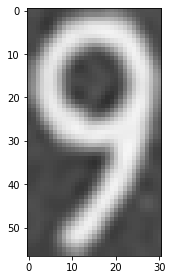

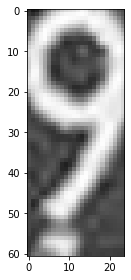

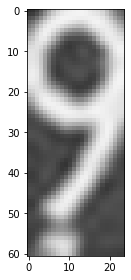

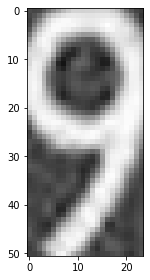

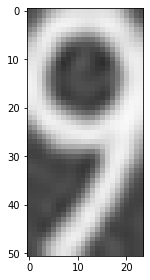

In [19]:
# optional -- character image enhancement
import cv2

for ch,i in zip(chars,range(len(chars))):
    io.imshow(ch)
    plt.show()
    result = cv2.GaussianBlur(ch,(5,5),0,0)
    io.imshow(result)
    plt.show()
    chars[i] = result

##### 7. Character Recognition

In [20]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

DATASET_DIR = './dataset'
classes = os.listdir(DATASET_DIR )

num_classes = len(classes)
img_rows, img_cols = 20, 20

if K.image_data_format() == 'channels_first':
    input_shape = [1, img_rows, img_cols]
else:
    input_shape = [img_rows, img_cols, 1]

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


# 7.1 Create a cnn model for character recognition

Here is a sample model. You can fine tune this model or build a different model to order to improve the accuracy.


In [21]:
# we provide a sample model here, 
# you can use other model as you like
model_char = Sequential()
model_char.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_char.add(Conv2D(64, (3, 3), activation='relu'))
model_char.add(MaxPooling2D(pool_size=(2, 2)))
model_char.add(Dropout(0.25))
model_char.add(Flatten())
model_char.add(Dense(128, activation='relu'))
model_char.add(Dropout(0.5))
model_char.add(Dense(num_classes, activation='softmax'))

model_char.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


We use pretrained character recognition model to recognize car plate characters.

In [22]:
model_char.load_weights("./char_cnn.h5")

In [23]:
def extend_channel(data):
    data = np.array(data)
    if K.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        
    return data

In [24]:
chars2 = []
for ch in chars:
    chars2.append(transform.resize(ch, [img_rows, img_cols]))
    
chars2 = np.stack(chars2)

In [25]:
ys = np.unique(classes)

#p_test = model_char.predict_classes(extend_channel(chars2))
predict_x=model_char.predict(extend_channel(chars2)) 
p_test=np.argmax(predict_x,axis=1)

print(' '.join([ys[p_test[i]] for i in range(len(p_test))]))

京 宁 9 9 9 9 5


# Use a self-defined resNet Model

In [ ]:
import tensorflow as tf

from tensorflow.keras import Input
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


class Res1:
    """
        Returns:
            shape of (4*c, w//s, w//s)
    """
    def __init__(self, c, s, kernel=3):
        self.c      = c
        self.s      = s
        self.kernel = kernel
    
    def __call__(self, X):
        short_cut   = X
        
        X           = Conv2D(self.c, 1, self.s)(X)
        X           = BatchNormalization()(X)
        X           = ReLU()(X)
        
        X           = Conv2D(self.c, self.kernel, 1)(X)
        X           = BatchNormalization()(X)
        X           = ReLU()(X)
        
        X           = Conv2D(self.c * 4, 1, 1)(X)
        X           = BatchNormalization()(X)
        
        short_cut   = Conv2D(self.c * 4, self.kernel, self.s)(short_cut)
        short_cut   = BatchNormalization()(short_cut)
        
        X           = Add()([short_cut, X])
        X           = ReLU()(X)
        return X
    

class Res2:
    """
        Returns:
            shape of (c, w, w)
    """
    def __init__(self, c):
        self.c  = c
    
    def __call__(self, X):
        short_cut = X
        
        X         = Conv2D(self.c // 4, 1, 1)(X)
        X         = BatchNormalization()(X)
        X         = ReLU()(X)
        
        X         = Conv2D(self.c // 4, 1, 1)(X)
        X         = BatchNormalization()(X)
        X         = ReLU()(X)
        
        X         = Conv2D(self.c, 1, 1)(X)
        X         = BatchNormalization()(X)
        
        X         = Add()([short_cut, X])
        X         = ReLU()(X)
        return X
        

def resNet(input_shape=(20, 20, 1)):
    
    X_input = Input(input_shape)
    
    X       = Conv2D(filters = 64, kernel_size = 3, strides = 2)(X_input)    # (9, 9, 64)
    X       = BatchNormalization()(X)
    X       = ReLU()(X)
    X       = MaxPool2D(pool_size = 3, strides = 2)(X)                       # (4, 4, 64)
    
    X       = Res1(64, 1)(X)                                            # (2, 2, 256)
    X       = Res2(256)(X)                                              # (2, 2, 256)
    X       = Res2(256)(X)                                              # (2, 2, 256)
    
    X       = Res1(128, 1, 1)(X)                                        # (2, 2, 512)
    X       = Res2(512)(X)                                              # (2, 2, 512)
    X       = Res2(512)(X)                                              # (2, 2, 512)
    X       = Res2(512)(X)                                              # (2, 2, 512)
    X       = Res2(512)(X)                                              # (2, 2, 512)
    X       = Res2(512)(X)                                              # (2, 2, 512)
    
    X       = AveragePooling2D(2)(X)
    
    X       = Flatten()(X)
    X       = Dense(65, activation="softmax")(X)
    
    model   = Model(inputs = X_input, outputs = X)
    return model

model = resNet((img_rows, img_cols, 1))

In [ ]:
model.load_weights("resNet.h5")

In [ ]:
chars2 = []
for ch in chars:
    chars2.append(transform.resize(ch, [img_rows, img_cols]))
    
chars2 = np.stack(chars2)

In [ ]:
ys = np.unique(classes)

#p_test = model_char.predict_classes(extend_channel(chars2))
predict_x=model_char.predict(extend_channel(chars2)) 
p_test=np.argmax(predict_x,axis=1)

print(' '.join([ys[p_test[i]] for i in range(len(p_test))]))